# Roller Coaster

### Project Goals

In [159]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

# Load databases
df_wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
df_steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
df_coasters = pd.read_csv("roller_coasters.csv")

# Concatenate winners databases
df_full = pd.concat([df_wood, df_steel]).reset_index()
print(df_full.head())

# Change height data type
df_coasters.num_inversions = df_coasters.num_inversions.astype(pd.Int64Dtype())

   index  Rank          Name                       Park             Location  \
0      0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1      1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2      2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3      3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4      4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [104]:
# Clean data with replacement in names
names_replace = [
    ("Grizzly \(KD\)", "Grizzly"),
    ("Intimidator-305", "Intimidator 305"),
    ("Superman The Ride", "Superman: The Ride"),
    ("^The ", "")]
# Clean data with replacement in parks
parks_replace = [
    ("Conneaut Lake Park", "Conneaut Lake"),
    ("Luna Park/Coney Island", "Luna Park"),
    ("Califoria’s Great America", "California’s Great America"),
    ("Mt. Olympus Theme Park", "Mount Olympus"),
    ("Oakwood Leisure Park", "Oakwood"),
    ("PNE Playland", "Playland"),
    ("ZDTs", "ZDT’s"),
    ("Fun Spot America", "Fun Spot")]

# Perform replacement with for loop
for i in names_replace:
    df_full["Name"] = df_full["Name"].str.replace(i[0], i[1], regex=True)
for i in parks_replace:
    df_full["Park"] = df_full["Park"].str.replace(i[0], i[1], regex=True)

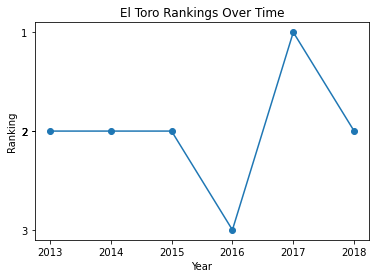

In [105]:
# Create a function to plot ranking over time for 1 roller coaster
def plot_ranking(name, park_name, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Select ranking and differentiate between roller coasters of the same name at different parks
  selected_rollercoaster = df[(df["Name"] == name) & (df["Park"] == park_name)]
  # Define x & y values
  years = selected_rollercoaster["Year of Rank"]
  ranks = selected_rollercoaster["Rank"]
  # Plot the selected coaster
  ax.plot(years, ranks, marker="o")
  # Set x & y ticks
  ax.set_xticks(years)
  ax.set_yticks(ranks)
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("{} Rankings Over Time".format(name))
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.show()
# Call a plot of Boulder Dash ranking over time
plot_ranking("El Toro", "Six Flags Great Adventure", df_full)


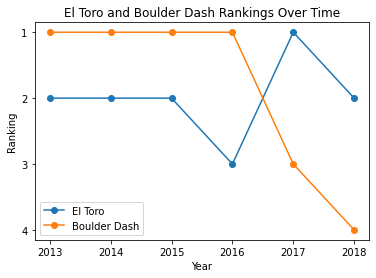

In [106]:

# Create a function to plot rankings over time for 2 roller coaster
def plot_two_rankings(names, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Create empty sets for unique and immutable collections
  years = set()
  ranks = set()
  # Add for loop to collect and plot all appropriate cases
  for name, park_name in names:
    # Select rankings and differentiate between roller coasters of the same name at different parks
    two_rollercoasters = df[(df["Name"] == name) & (df["Park"] == park_name)]
    # Define x & y values and add them to the empty sets
    year = two_rollercoasters["Year of Rank"]
    years.update(year)
    rank = two_rollercoasters["Rank"]
    ranks.update(rank)
    # Plot the selected coasters
    ax.plot(year, rank, marker="o", label=name)
  # Set x & y ticks
  ax.set_xticks(sorted(years))
  ax.set_yticks(sorted(ranks))
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("{} and {} Rankings Over Time".format(names[0][0], names[1][0]))
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.legend()
  plt.show()
# Call a plot of Boulder Dash rankings over time
plot_two_rankings([("El Toro", "Six Flags Great Adventure"), ("Boulder Dash", "Lake Compounce")], df_full)

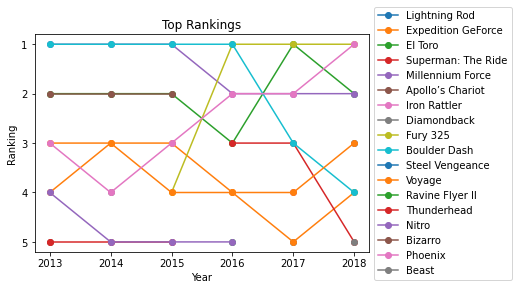

In [115]:
# Create a function to plot top n rankings over time
def plot_top_rankings(n, df):
  # Create a subplot for visualization manipulations
  ax = plt.subplot()
  # Select rankings equal to or less than n value
  top_n_rankings = df[df["Rank"] <= n]
  # Add for loop to plot each selected case
  for coaster in set(top_n_rankings["Name"]):
    # Differentiate between roller coasters and give a label
    coaster_rankings = top_n_rankings[top_n_rankings["Name"] == coaster]
    # Plot the selected coaster
    ax.plot(coaster_rankings["Year of Rank"], coaster_rankings["Rank"], label=coaster, marker="o")
  # Set ticks
  ax.set_yticks([i for i in range(1,6)])
  # Invert y-axis
  ax.invert_yaxis()
  # Give labels
  plt.title("Top Rankings")
  plt.xlabel("Year")
  plt.ylabel("Ranking")
  plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
  plt.show()

# Create a plot of top n rankings over time
plot_top_rankings(5, df_full)

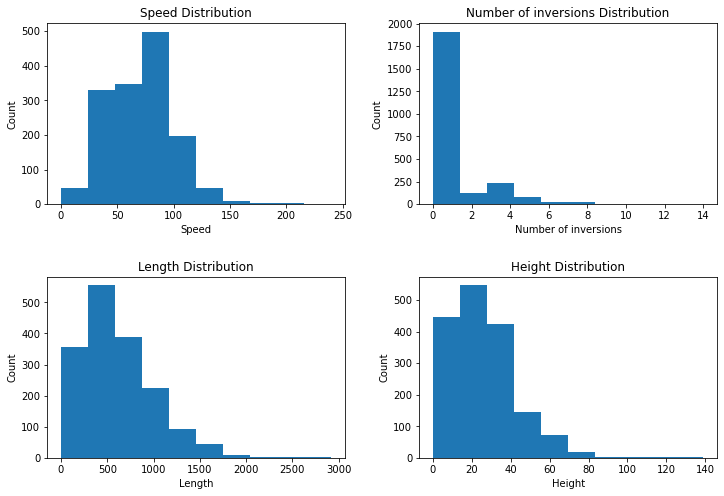

In [220]:
# Create a function to plot histogram of column values
def plot_histogram(df, ax, column, title):
    data = df[column].dropna()
    ax.hist(data)
    ax.set_xlabel(title)
    ax.set_ylabel("Count")
    ax.set_title("{} Distribution".format(title))
# Create subplots for the following numeric columns + height with its own def
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Adjust subplots
plt.subplots_adjust(wspace=0.25, hspace=0.4)

# Create histogram of roller coaster speed
plot_histogram(df_coasters, axs[0, 0], "speed", "Speed")
# Create histogram of roller coaster length
plot_histogram(df_coasters, axs[0, 1], "num_inversions", "Number of inversions")
# Create histogram of roller coaster number of inversions
plot_histogram(df_coasters, axs[1, 0], "length", "Length")

# Create a function to plot histogram of <= 140 height values 
def plot_height_histogram(df, ax):
  # Remove the outliers that skew the data
  heights = df[df["height"] <= 140]["height"].dropna()
  plt.hist(heights)
  # Give titles
  plt.title("Height Distribution")
  plt.xlabel("Height")
  plt.ylabel("Count")
  plt.show()

# Create a histogram of roller coaster height
plot_height_histogram(df_coasters, axs[1, 1])

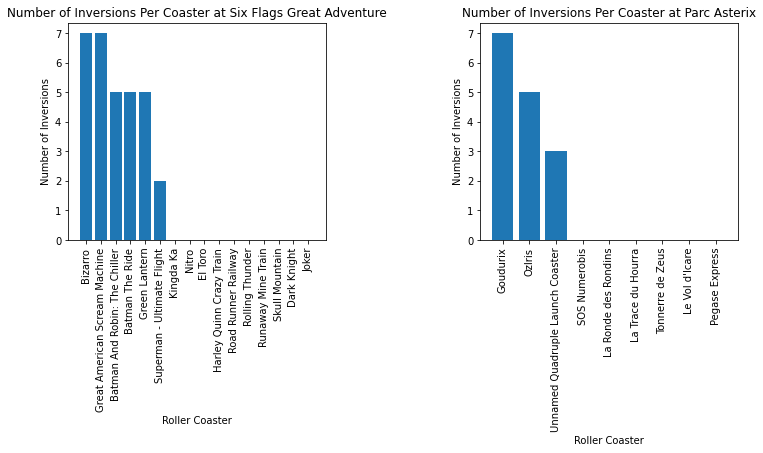

In [218]:
# Create a function to plot inversions by coaster at park
def plot_inversions_by_coaster(df, park_name, ax):
  # Select coasters in a park
  park_coasters = df[df["park"] == park_name]
  # Sort values for better visualization
  park_coasters = park_coasters.sort_values("num_inversions", ascending=False)
  # Select names within a specific park
  coaster_names = park_coasters["name"]
  # Select # of inversions for coasters in a park
  number_inversions = park_coasters["num_inversions"]
  # Create a barplot
  ax.bar(range(len(number_inversions)), number_inversions)
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names, rotation=90)
  # Give titles
  ax.set_title("Number of Inversions Per Coaster at {}".format(park_name))
  ax.set_xlabel("Roller Coaster")
  ax.set_ylabel("Number of Inversions")

# Create a subplot for visualization manipulations
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.6)
# Create a barplot of inversions by roller coasters
plot_inversions_by_coaster(df_coasters, "Six Flags Great Adventure",  axs[0])
plot_inversions_by_coaster(df_coasters, "Parc Asterix", axs[1])
plt.show()

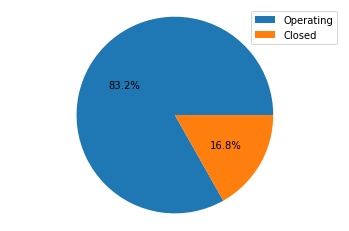

In [171]:
# Create a function to plot a pie chart of statuses
def pie_chart_status(df):
  # Select operating roller coasters
  operating_coasters = df[df["status"] == "status.operating"]
  # Select closed roller coasters
  closed_coasters = df[df["status"] == "status.closed.definitely"]
  # Calculate number of operating roller coasters
  num_operating_coasters = len(operating_coasters)
  # Calculate number of closed roller coasters
  num_closed_coasters = len(closed_coasters)
  # List status counts
  counts = [num_operating_coasters, num_closed_coasters]
  # Create a pie chart
  plt.pie(counts, autopct="%0.1f%%")
  plt.axis("equal")
  plt.legend(["Operating","Closed"])
  plt.show()

# Create pie chart of roller coasters
pie_chart_status(df_coasters)

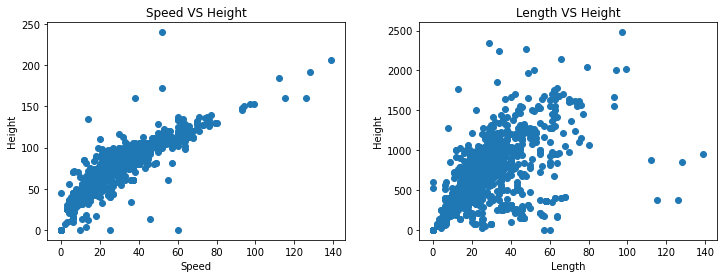

In [217]:
# Create a function to plot scatter of speed vs height
def plot_scatter(df, ax, col_1, col_2, title_1, title_2):
  df = df[df["height"] < 140]
  ax.scatter(df[col_1], df[col_2])
  ax.set_xlabel(title_1)
  ax.set_ylabel(title_2)
  ax.set_title("{} VS {}".format(title_1, title_2))
  # Create a subplot for visualization manipulations
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)
# Create a scatter plot of roller coaster height by speed
plot_scatter(df_coasters, axs[0], "height", "speed", "Speed", "Height")
plot_scatter(df_coasters, axs[1], "height", "length", "Length", "Height")
plt.show()

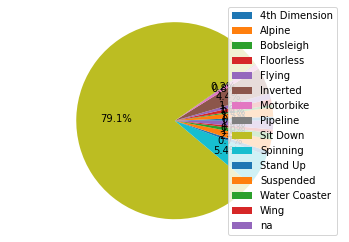

In [271]:
# Create a pie chart to compare seating types
df = df_coasters.groupby("seating_type").name.count().reset_index()
plt.pie(df["name"], autopct="%0.1f%%")
plt.legend(labels = df["seating_type"], loc="right")
plt.axis("equal")
plt.show()

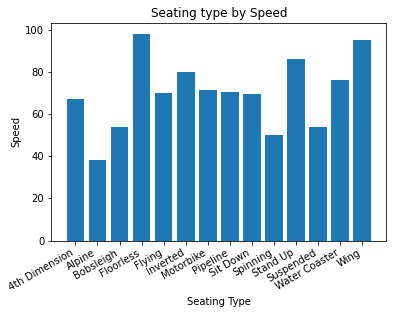

In [246]:
# Create a plot of seating types to compare mean speed
df = df_coasters.groupby("seating_type").speed.mean().reset_index().dropna()
# Sort values
df.sort_values("speed", ascending=False)
# Create a bar chart
plt.bar(range(len(df["seating_type"])), df["speed"])
# Give titles
plt.title("Seating type by Speed")
plt.xlabel("Seating Type")
plt.ylabel("Speed")
# Create a subplot for better visualization
ax = plt.subplot()
# Set x ticks
ax.set_xticks(range(len(df["seating_type"])))
ax.set_xticklabels(df["seating_type"], rotation=30, horizontalalignment="right")
plt.show()